In [1]:
# Importing libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# Importing the dataset 

dataset = pd.read_csv("Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


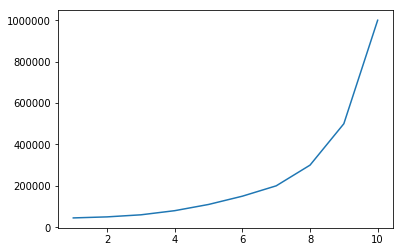

In [3]:
# Understanding the relationship beteen the level and the salary
'''
It shows that it is not linear, rather ploynomial
We we will go for polynomial regression
In this dataset, the Position is already encoded with Level
So, we will use Level only to use train the model
'''

plt.plot(dataset['Level'],dataset['Salary'])

In [4]:
# Dividing features and target variables

X = dataset.iloc[ : , 1:2].values
y = dataset.iloc[ : , 2:].values


In [5]:
# Experimenting the Linear Regression

'''
We will not split the dataset here 
cause the data set is too small
and we will make the most use of it

'''


from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
# Now lets do the polynomial regression
# Before that we get the polynomial values 

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
X_poly

# Now we create the polynomial regression model

lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

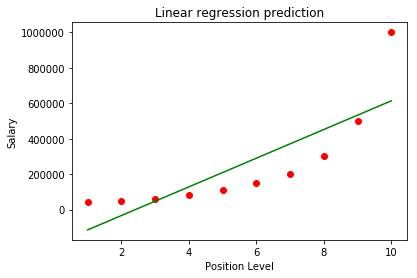

In [7]:
# Visualization of Linear regression result

plt.scatter(X,y, color='red')
plt.plot(X, lin_reg.predict(X), color = 'green')
plt.title('Linear regression prediction')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

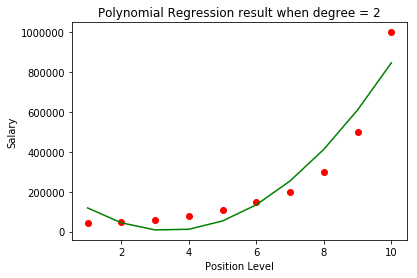

In [8]:
# Visualization of Polynomial regression Result

plt.scatter(X,y, color = 'red')
plt.plot(X,lin_reg2.predict(X_poly), color = 'green') # we have to inform ponomial features
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title('Polynomial Regression result when degree = 2')
plt.show()


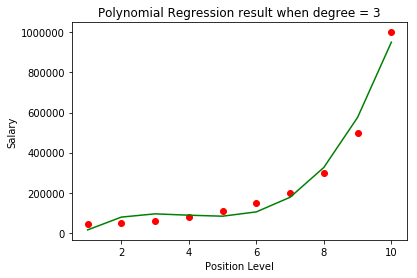

In [9]:
# Same polynomial regression with higher degree

poly_reg2 = PolynomialFeatures(degree=3) 
X_poly2 = poly_reg2.fit_transform(X)
poly_reg2.fit(X_poly2,y)

lin_reg3 = LinearRegression()
lin_reg3.fit(X_poly2,y)

plt.scatter(X,y, color = 'red')
plt.plot(X,lin_reg3.predict(X_poly2), color = 'green') # we have to inform ponomial features
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title('Polynomial Regression result when degree = 3')
plt.show()


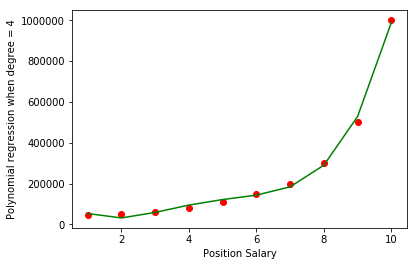

In [14]:
# Let's take the experiment even further 

# Transforming X to the degree 4 polinomial
poly_reg3 = PolynomialFeatures(degree=4)
X_poly3 = poly_reg3.fit_transform(X)
poly_reg3.fit(X_poly3,y)

# Fitting degree 4 polinomial X to the linear regression
lin_reg4 = LinearRegression()
lin_reg4.fit(X_poly3,y)

plt.scatter(X,y,color='red')
plt.plot(X, lin_reg4.predict(X_poly3), color = 'green')
plt.xlabel('Position Salary')
plt.ylabel('Polynomial regression when degree = 4')
plt.show()


In [22]:
# Lets predict a new salary now by inputting the level

lin_reg4.predict(poly_reg3.fit_transform([[9.5]]))


array([[724730.02258145]])